We will load the `tidyverse` package and explore data using tools from `dplyr` and `ggplot` (packages part of the `tidyverse`)



In [1]:
library(tidyverse)



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


We will use data collected by the FiveThirtyEight team for the story [The Ultimate Halloween Candy Power Ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/)

The dataset can be found here: <https://github.com/fivethirtyeight/data/tree/master/candy-power-ranking>


In [5]:
# read the data
candy <- read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/candy-power-ranking/candy-data.csv")




Rows: 85 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): competitorname
dbl (12): chocolate, fruity, caramel, peanutyalmondy, nougat, crispedricewaf...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Check first entries:



In [6]:
candy |> head()



competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755


For binary variables, `1` means yes, `0` means no.

The data contains the following fields:

Header | Description
-------|--------------------------------------------------
`chocolate` | Does it contain chocolate?
`fruity` | Is it fruit flavored?
`caramel` | Is there caramel in the candy?
`peanutalmondy` | Does it contain peanuts, peanut butter or almonds?
`nougat` | Does it contain nougat?
`crispedricewafer` | Does it contain crisped rice, wafers, or a cookie component?
`hard` | Is it a hard candy?
`bar` | Is it a candy bar?
`pluribus` | Is it one of many candies in a bag or box?
`sugarpercent` | The percentile of sugar it falls under within the data set.
`pricepercent` | The unit price percentile compared to the rest of the set.
`winpercent` | The overall win percentage according to 269,000 matchups.



## Exploring `dplyr`

Find those that have caramel:


In [7]:
# has caramel?
candy |> filter(caramel == 1)


competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.91455
Caramel Apple Pops,0,1,1,0,0,0,0,0,0,0.604,0.325,34.51768
Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.06407
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.09956
Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.80070
Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.35334
Rolo,1,0,1,0,0,0,0,0,1,0.860,0.860,65.71629
Snickers,1,0,1,1,1,0,0,1,0,0.546,0.651,76.67378


Find those with unit price percentile compared to the rest of the set higher than 0.9



In [8]:
# price filter
candy |> filter(pricepercent > 0.9)



competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hershey's Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.28448
Hershey's Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.49050
Hershey's Special Dark,1,0,0,0,0,0,0,1,0,0.430,0.918,59.23612
Mr Good Bar,1,0,0,1,0,0,0,1,0,0.313,0.918,54.52645
Nik L Nip,0,1,0,0,0,0,0,0,1,0.197,0.976,22.44534
Ring pop,0,1,0,0,0,0,1,0,0,0.732,0.965,35.29076
Nestle Smarties,1,0,0,0,0,0,0,0,1,0.267,0.976,37.88719
Twix,1,0,1,0,0,1,0,1,0,0.546,0.906,81.64291


Find those with a name including the word "Milk":



In [10]:
# milk candy?
candy |> filter(stringr::str_detect(competitorname, 'Milk'))


competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Hershey's Milk Chocolate,1,0,0,0,0,0,0,1,0,0.430,0.918,56.49050
Milk Duds,1,0,1,0,0,0,0,0,1,0.302,0.511,55.06407
Milky Way,1,0,1,0,1,0,0,1,0,0.604,0.651,73.09956
Milky Way Midnight,1,0,1,0,1,0,0,1,0,0.732,0.441,60.80070
Milky Way Simply Caramel,1,0,1,0,0,0,0,1,0,0.965,0.860,64.35334


Compare `fruity` and `caramel` candies, use and average for the variable `sugarpercent` (percentile of sugar it falls under within the data set)



In [11]:
# summarize data
candy |> group_by(fruity) |> summarise(avg_sugar_percent = mean(sugarpercent, na.rm = TRUE))


fruity,avg_sugar_percent
<dbl>,<dbl>
0,0.4873404
1,0.4678947


In [12]:
# summarize data
candy |> group_by(caramel) |> summarise(avg_sugar_percent = mean(sugarpercent, na.rm = TRUE))



caramel,avg_sugar_percent
<dbl>,<dbl>
0,0.4509437
1,0.6191428


Create a new categorical variable that indicates if a candy is "popular" (`winpercent` higher than 60), or "not that popular" (`winpercent` lower than 60)

First check in `winpercent > 60` exists:


In [13]:
candy_new <- candy |>
   filter(winpercent > 60) |>
   mutate(popular = 1) 

candy_new |> head()

competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100 Grand,1,0,1,0,0,1,0,1,0,0.732,0.860,66.97173,1
3 Musketeers,1,0,0,0,1,0,0,1,0,0.604,0.511,67.60294,1
Hershey's Krackel,1,0,0,0,0,1,0,1,0,0.430,0.918,62.28448,1
Kit Kat,1,0,0,0,0,1,0,1,0,0.313,0.511,76.76860,1
Peanut butter M&M's,1,0,0,1,0,0,0,0,1,0.825,0.651,71.46505,1
M&M's,1,0,0,0,0,0,0,0,1,0.825,0.651,66.57458,1


Then create new variable using the `mutate()` function:



In [18]:
candy_new <- candy |>
   filter(winpercent < 60) |>
   mutate(popular = 0) 

candy_new |> head()


competitorname,chocolate,fruity,caramel,peanutyalmondy,nougat,crispedricewafer,hard,bar,pluribus,sugarpercent,pricepercent,winpercent,popular
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
One dime,0,0,0,0,0,0,0,0,0,0.011,0.116,32.26109,0
One quarter,0,0,0,0,0,0,0,0,0,0.011,0.511,46.11650,0
Air Heads,0,1,0,0,0,0,0,0,0,0.906,0.511,52.34146,0
Almond Joy,1,0,0,1,0,0,0,1,0,0.465,0.767,50.34755,0
Baby Ruth,1,0,1,1,1,0,0,1,0,0.604,0.767,56.91455,0
Boston Baked Beans,0,0,0,1,0,0,0,0,1,0.313,0.511,23.41782,0


## Exploring `ggplot`


Create a bar plot like the one shown in the article


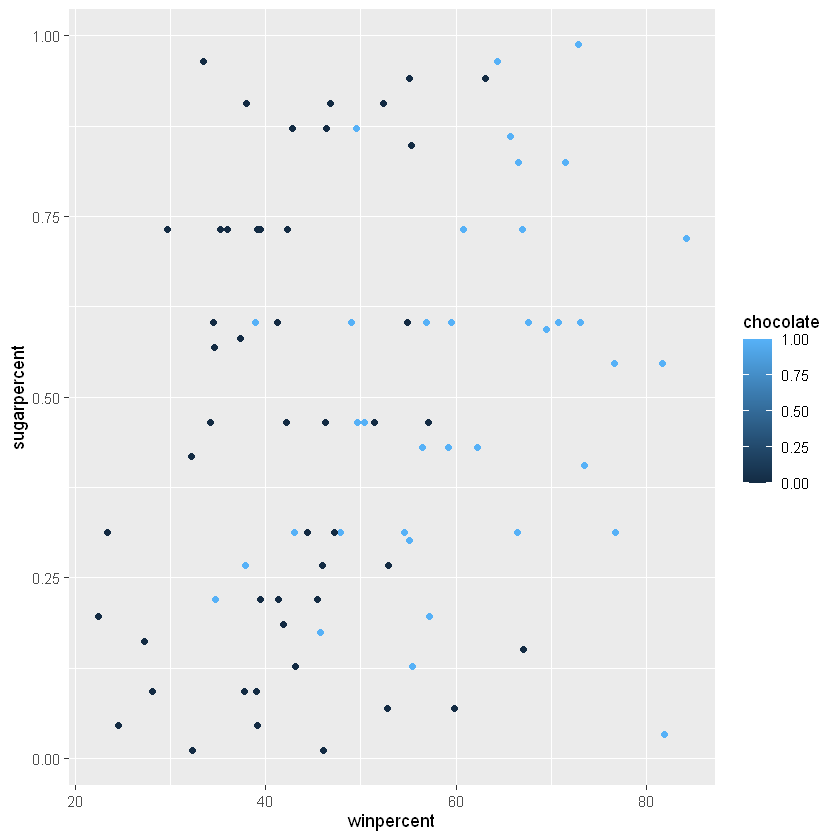

In [25]:

ggplot(candy, aes(x=winpercent,y=sugarpercent,color=chocolate)) + geom_point()


Change orientation of bars and reorder based on ranking:



Remove vertical label, add title and subtitle:

